#Checkpoint-1

1. Data Cleaning:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
url = 'https://raw.githubusercontent.com/parjanya-rajput/Project_WoC_7.0_Fake_Review_Detection/refs/heads/main/dataset/fakeReviewData.csv'
data = pd.read_csv(url)

In [30]:
data.head(15)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [31]:
data.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [32]:
data.duplicated().sum()

12

In [33]:
data.drop_duplicates(inplace=True)

In [34]:
data.duplicated().sum()

0

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40420 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40420 non-null  object 
 1   rating    40420 non-null  float64
 2   label     40420 non-null  object 
 3   text_     40420 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [36]:
data.describe()

,rating
count,40420.000000
mean,4.256358
std,1.144452
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [37]:
data.shape

(40420, 4)

In [38]:
data['label'].value_counts() # data is not skewed we have almost equal of both types

,count
label,
OR,20215
CG,20205


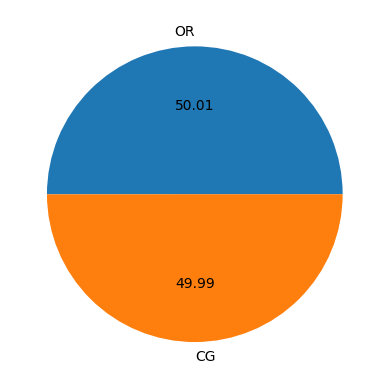

In [39]:
plt.pie(data['label'].value_counts(), labels=['OR', 'CG'], autopct="%0.2f")
plt.show() #Data is imbalanced with high percent of ham and less percent of spam

In [40]:
print(data['rating'].value_counts())

rating
5.0    24547
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64


In [41]:
data['category'].value_counts()

,count
category,
Kindle_Store_5,4728
Books_5,4369
Pet_Supplies_5,4251
Home_and_Kitchen_5,4056
Electronics_5,3988
Sports_and_Outdoors_5,3944
Tools_and_Home_Improvement_5,3858
Clothing_Shoes_and_Jewelry_5,3847
Toys_and_Games_5,3792


# Feature Creation

- Number of characters
- Number of Words
- Number of sentences

In [42]:
data['num_char'] = data['text_'].apply(len)
data.head()

,category,rating,label,text_,num_char
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85


In [43]:
data['num_words'] = data['text_'].apply(lambda x: len(nltk.word_tokenize(x)))
data.head()

,category,rating,label,text_,num_char,num_words
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,18
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,19
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,16
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,19
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,20


In [44]:
data['num_sentences'] = data['text_'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,category,rating,label,text_,num_char,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,20,3


In [45]:
data.sample(10)

,category,rating,label,text_,num_char,num_words,num_sentences
2435,Home_and_Kitchen_5,3.0,CG,I am pleased with the quality of the pieces. I...,201,48,5
29864,Books_5,5.0,OR,"From Pam Becker ... this was a wonderful, magi...",152,35,3
21062,Pet_Supplies_5,2.0,OR,I was disappointed in this. Maybe it's just m...,148,33,3
23035,Pet_Supplies_5,3.0,CG,This product could have easily been an improve...,470,115,9
19095,Tools_and_Home_Improvement_5,3.0,OR,"first, packaging was TERRIBLE. i know it's a l...",953,237,13
20385,Pet_Supplies_5,5.0,OR,"I thought it was to bright at first, but its p...",100,25,3
3792,Home_and_Kitchen_5,5.0,CG,I received this pan as a gift and am very plea...,824,197,13
19954,Pet_Supplies_5,4.0,OR,"with these it's all about freshness & price, e...",88,19,2
3712,Home_and_Kitchen_5,5.0,CG,I bought this because I wanted a nice wide woo...,731,168,11
31390,Books_5,5.0,CG,"Because it is so long, it takes me a long time...",346,88,6


In [46]:
data[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,40420.000000,40420.000000,40420.000000
mean,351.321227,76.681692,5.276695
std,369.850284,79.238220,4.914669
min,24.000000,2.000000,1.000000
25%,107.000000,24.000000,2.000000
50%,198.000000,44.000000,3.000000
75%,439.000000,96.000000,6.000000
max,2827.000000,510.000000,133.000000


Analyze separately

In [47]:
print('Computer Generated')
data[data['label']=='CG'][['num_char','num_words','num_sentences']].describe()

Computer Generated


,num_char,num_words,num_sentences
count,20205.000000,20205.000000,20205.000000
mean,305.646523,69.247661,5.454838
std,307.089932,69.672653,5.306643
min,24.000000,2.000000,1.000000
25%,96.000000,21.000000,2.000000
50%,174.000000,39.000000,3.000000
75%,383.000000,87.000000,7.000000
max,1717.000000,344.000000,133.000000


In [48]:
print('Human Written')
data[data['label']=='OR'][['num_char','num_words','num_sentences']].describe()

Human Written


,num_char,num_words,num_sentences
count,20215.000000,20215.000000,20215.000000
mean,396.973337,84.112046,5.098640
std,418.438191,87.133606,4.481878
min,28.000000,7.000000,1.000000
25%,121.000000,26.000000,2.000000
50%,224.000000,48.000000,4.000000
75%,498.000000,106.000000,6.000000
max,2827.000000,510.000000,51.000000


Human written have more avg number of characters and words,

But computer generated has more sentences

- Conclusion, original reviews are not of complete sentences but are long enough with less grammar

Now here we convert the label column to target and assign

0 -> Original Reviews(OR)

1 -> Computer Generated(Cg)

In [49]:
data.rename(columns={'label':'target'}, inplace=True)

In [51]:
data.head()

,category,rating,target,text_,num_char,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,85,20,3


In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [52]:
data['target'] = encoder.fit_transform(data['target']) #CG -> 0 and OR -> 1
data.head()

,category,rating,target,text_,num_char,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20,3


<Axes: >

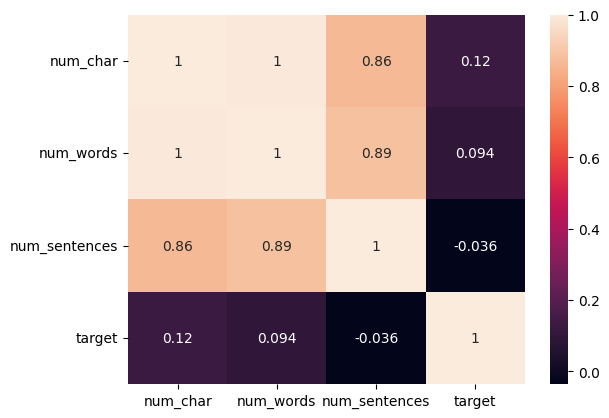

In [53]:
sns.heatmap(data[['num_char','num_words','num_sentences','target']].corr(), annot=True)

From here on I have two approaches
- Take only number of characters/number of words which show that as they are highly co-related and for original reviews mean of number of characters/words were higher than the computer generated

- Take only number of sentences, as the mean of num_sentences is higher for computer generated ones

# Text Pre-processing
- Lowercase
- Tokenisation
- Remove Special Characters
- Remove stopwords and punctuation
- Stemming/lemmating

In [55]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [65]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [74]:
import string
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  transformed = []

  for word in text:
    if word.isalnum() and word not in stopwords.words('english') and word not in string.punctuation:
      transformed.append(ps.stem(word))


  return " ".join(transformed)

In [73]:
transform_text("I am ||||| ??? &a good boy is rocking in racing and running with high speeds") #with lemmatizer

'good boy rocking racing running high speed'

In [75]:
transform_text("I am ||||| ??? &a good boy is rocking in racing and running with high speeds") #with stemmer

'good boy rock race run high speed'

For now going with stemmer

In [76]:
data['transformed_text'] = data['text_'].apply(transform_text)
data.head()

,category,rating,target,text_,num_char,num_words,num_sentences,transformed_text
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18,3,love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19,2,love great upgrad origin mine coupl year
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16,2,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19,2,miss inform use great product price
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20,3,nice set good qualiti set two month


In [81]:
data.to_csv('fakeReviewData_processed.csv', index=False)

# Checkpoint-2

Now we will create a wordcloud to see the most frequent words, don't know why I am actually doing but I hope will get some clue

In [82]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [83]:
cg_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

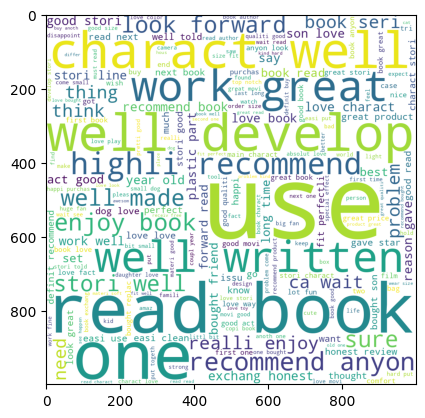

In [84]:
plt.imshow(cg_wc)

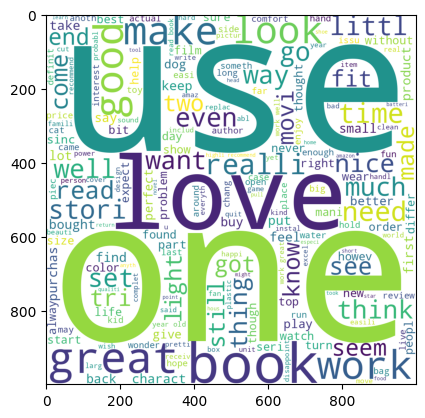

In [85]:
or_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(or_wc)

In [86]:
or_corpus =[]
for review in data[data['target'] == 1]['transformed_text'].tolist():
  for word in review.split():
    or_corpus.append(word)

In [87]:
from collections import Counter
pd.DataFrame(Counter(or_corpus).most_common(30))

,0,1
0,one,7337
1,book,6380
2,love,6351
3,like,6284
4,use,6123
5,great,5816
6,get,4840
7,good,4799
8,would,4677
9,work,4592


In [88]:
cg_corpus =[]
for review in data[data['target'] == 0]['transformed_text'].tolist():
  for word in review.split():
    cg_corpus.append(word)

In [89]:
pd.DataFrame(Counter(cg_corpus).most_common(30))

,0,1
0,love,12722
1,book,10957
2,great,10796
3,good,9452
4,one,7286
5,read,7171
6,stori,6977
7,use,6510
8,like,6468
9,would,6091
